In [1]:
import numpy as np
import matplotlib.pyplot as pl
import math as mt
import time
from mpl_toolkits import mplot3d

## Task A: Heat conduction in a bar

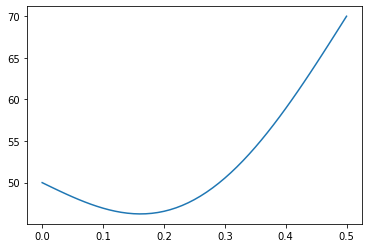

In [2]:
# Task A

# This script solves the heat conduction equation

# set the input data
# spatial domain
a = 0  # lower boundary
b = 0.5 # upper boundary
dx = 0.01 # spatial increment
# temporal domain
tend = 3600 # temporal span
dt = 1 # temporal increment

# set the physics
# boundary conditions (fixed temperature at boundaries)
Ta = 50 
Tb = 70
# initial condition (initial temperature of the bar)
T0 = 10 # initial temperature

alpha = 1.172e-5 # thermal diffusivity
# ================================================


# greate the spatial grid points
x = np.arange(a,b+dx,dx)
Nx = len(x)
# create the temporal grid points
t = np.arange(0,tend+dt,dt)
Nt = len(t)

# create the solution matrix
T = np.ndarray((Nt,Nx))

# set the inital value everywhere along the bar
T[0,:] = T0

# compute the constant coefficient
c = alpha * dt / dx**2

# compute the solution incrementally at subsequent time steps
for p in range(1,Nt):
    # compute at time step p, i.e. t = p * dt
    # do it for every node in the spatial grid
    # start with the boundaries
    T[p,0] = Ta
    T[p,Nx-1] = Tb
    # do the interior nodes
    for i in range(1,Nx-1):
        # apply the discretised equation
        T[p,i] = c * ( T[p-1,i+1] + T[p-1,i-1] ) + (1 - 2*c) * T[p-1,i]

pl.plot(x,T[-1,:])




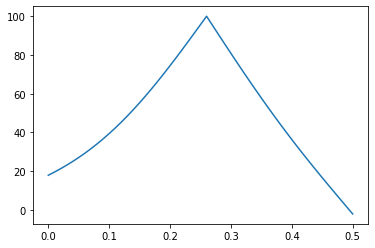

In [3]:
# Task B

# This script solves the heat conduction equation with mixed boundary conditions


# set the input data
# spatial domain
a = 0  # lower boundary
b = 0.5 # upper boundary
dx = 0.01 # spatial increment
# temporal domain
tend = 1200 # temporal span
dt = 1 # temporal increment

# set the physics
# initial condition (initial temperature of the bar)
T0 = 10 # initial temperature

Tw = 5 # temperature of surrounding water
alpha = 1.172e-5 # thermal diffusivity
K = 40  # thermal conductivity
h = 500 # heat transfer coefficient
# ================================================

# greate the spatial grid points
x = np.arange(a,b+dx,dx)
Nx = len(x)
# create the temporal grid points
t = np.arange(0,tend+dt,dt)
Nt = len(t)

# create the solution matrix
T = np.ndarray((Nt,Nx))

# set the inital value everywhere along the bar
T[0,:] = T0
T[0,mt.ceil(Nx/2)] = 100 # set the sourse at the middle of the bar

# compute the constant coefficient
c = alpha * dt / dx**2

# compute the solution incrementally at subsequent time steps
for p in range(1,Nt):
    # compute at time step p, i.e. t = p * dt
    # do it for every node in the spatial grid
    # start with the boundaries
    T[p,0] = (h*Tw+K/dx*T[p-1,1]) / (h+K/dx)
    T[p,Nx-1] = (h*Tw+K/dx*T[p-1,Nx-2]) / -(h+K/dx)
    # do the interior nodes
    for i in range(1,Nx-1):
        # apply the discretised equation
        T[p,i] = c * ( T[p-1,i+1] + T[p-1,i-1] ) + (1 - 2*c) * T[p-1,i]

    # enforce the source at the central node
    T[p,mt.ceil(Nx/2)] = 100


#pl.plot(x,T[0,:])
pl.plot(x,T[-1,:])


0.46880000000000005


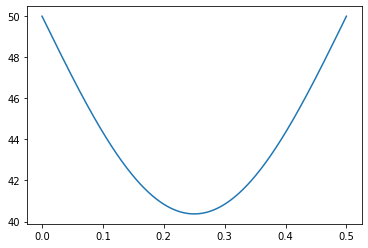

In [4]:
# Task C

# This script solves the heat conduction equation

# set the input data
# spatial domain
a = 0  # lower boundary
b = 0.5 # upper boundary
dx = 0.001 # spatial increment
# temporal domain
tend = 3600 # temporal span
dt = 0.04 # temporal increment

# set the physics
# boundary conditions (fixed temperature at boundaries)
Ta = 50 
Tb = 50
# initial condition (initial temperature of the bar)
T0 = 10 # initial temperature

alpha = 1.172e-5 # thermal diffusivity
# ================================================


# greate the spatial grid points
x = np.arange(a,b+dx,dx)
Nx = len(x)
# create the temporal grid points
t = np.arange(0,tend+dt,dt)
Nt = len(t)

# create the solution matrix
T = np.ndarray((Nt,Nx))

# set the inital value everywhere along the bar
T[0,:] = T0

# compute the constant coefficient
c = alpha * dt / dx**2

# compute the solution incrementally at subsequent time steps
for p in range(1,Nt):
    # compute at time step p, i.e. t = p * dt
    # do it for every node in the spatial grid
    # start with the boundaries
    T[p,0] = Ta
    T[p,Nx-1] = Tb
    # do the interior nodes
    for i in range(1,Nx-1):
        # apply the discretised equation
        T[p,i] = c * ( T[p-1,i+1] + T[p-1,i-1] ) + (1 - 2*c) * T[p-1,i]
        
Cour = alpha * dt / dx**2
print(Cour)

pl.plot(x,T[-1,:])

-14.999594529952313


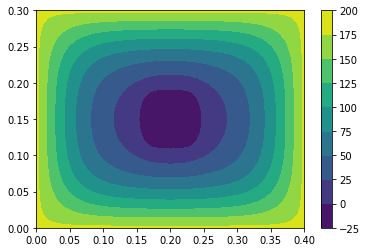

In [7]:
# Task D
# This script solves the spatial 2-D heat conduction equation


# set the input data
# spatial domain
xa = 0
xb = 0.4
ya = 0
yb = 0.3
pw = 0.06  # potato size

dx = 0.01 # spatial increment
dy = dx
# temporal domain
dt = 1 # temporal increment
tend = 90  # temporal span

# set the physics
Toven = 25 # initial Temperature of oven
Tpot = -15 # initial Temperature of potato
Tw = 180 # T of oven walls

alphaAir = 1.9e-5 # thermal diffusivity of air
alphapot = 1.3e-7 # thermal diffusivity of potato
# ================================================


# position of the potato
xap = (xb-xa)/2 - pw/2
xbp = (xb-xa)/2 + pw/2
yap = (yb-ya)/2 - pw/2 
ybp = (yb-ya)/2 + pw/2


# greate the spatial grid points
x = np.arange(xa,xb+dx,dx)
Nx = len(x)
y = np.arange(ya,yb+dy,dy)
Ny = len(y)
# create the temporal grid points
t = np.arange(0,tend+dt,dt)
Nt = len(t)

# create the solution matrix
T = np.ndarray((Nt,Nx,Ny))

# I am defining a matix alpha of thermal diffusivity, in case we wish to have different spatial values, 
# i.e. the diffusivity of the potato where the potato lays.
alpha = np.ndarray((Nx,Ny))
alpha[:,:] = alphaAir


# set the inital value everywhere in the oven
T[0,:,:] = Toven
# initialise the tempearture of the potato
for i in range(0,Nx):
    for j in range(0,Ny):
        if (xap<=x[i]<=xbp) and (yap<=y[j]<=ybp):
            T[0,i,j] = Tpot
            alpha[i,j] = alphapot

# check the Courant condition
Courant = np.max(alpha) * dt/ dx**2

# compute the constant coefficient
cx = alpha * dt / dx**2
cy = alpha * dt / dy**2

# compute the solution incrementally at subsequent time steps
for p in range(1,Nt):
    # compute at time step p, i.e. t = p * dt
    # do it for every node in the spatial grid
    # start with the boundaries
    T[p,0,:] = Tw # N
    T[p,Nx-1,:] = Tw # S
    T[p,:,0] = Tw # W
    T[p,:,Ny-1] = Tw # E
    # do the interior nodes
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            # apply the discretised equation
            T[p,i,j] = cx[i,j]*(T[p-1,i+1,j]+T[p-1,i-1,j]) + \
                       cy[i,j]*(T[p-1,i,j+1]+T[p-1,i,j-1]) + \
                       (1 - 2*cx[i,j] - 2*cy[i,j]) * T[p-1,i,j]



print( np.min(T[-1,:,:]) )

# plot surface or contour plot
(Yg, Xg) = np.meshgrid(y,x)
pl.contourf(Xg,Yg,T[-1,:,:])
pl.colorbar()



In [8]:
xap

0.17

In [3]:
for i in range(0,100,1):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
